# Pymaceuticals Inc.
---

### Analysis
* From the data, we observed Capomulin drug regimen was tested the most for the treatment of mice whereas Propriva was tested the least.
* We also observated there's a strong positive correlation between mice weight and average tumor volume (0.84) i.e the larger the mouse, the larger the tumor volume observed.
* Furthermore, we also noticed that there are 51% male mice and 49% female mice in the data.
* We observed Infubinol drug regimen left mice with the largest final tumor volume.

In [52]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import random
from scipy.stats import linregress

# Random seed
random.seed(11)

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
pymaceuticals_df = pd.merge(study_results, mouse_metadata, how = "left", on = "Mouse ID")

# Display the data table for preview
pymaceuticals_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
total_mice = len(pd.unique(pymaceuticals_df["Mouse ID"]))
total_mice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate = pymaceuticals_df.loc[pymaceuticals_df.duplicated(subset = ["Mouse ID", "Timepoint"])]
duplicate["Mouse ID"].unique()

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID.
pymaceuticals_df[pymaceuticals_df["Mouse ID"] == "g989"]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# problem here
without_duplicate_df = pymaceuticals_df[pymaceuticals_df["Mouse ID"] != "g989"]
without_duplicate_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
new_total_mice = len(pd.unique(without_duplicate_df["Mouse ID"]))
new_total_mice

248

## Summary Statistics

In [7]:
without_duplicate_df.describe()

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Age_months,Weight (g)
count,1880.000000,1880.000000,1880.000000,1880.000000,1880.000000
mean,19.606383,50.435293,1.025000,12.757979,25.660106
std,14.094238,8.914197,1.139971,7.181998,3.935064
min,0.000000,22.050126,0.000000,1.000000,15.000000
25%,5.000000,45.000000,0.000000,7.000000,25.000000
50%,20.000000,48.933454,1.000000,13.000000,27.000000
75%,30.000000,56.324075,2.000000,19.250000,29.000000
max,45.000000,78.567014,4.000000,24.000000,30.000000


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
summary = without_duplicate_df.groupby("Drug Regimen")

mean = summary.mean()["Tumor Volume (mm3)"]
median = summary.median()["Tumor Volume (mm3)"]
variance = summary.var()["Tumor Volume (mm3)"]
sd = summary.std()["Tumor Volume (mm3)"]
sem = summary.sem()["Tumor Volume (mm3)"]

# Assemble the resulting series into a single summary dataframe.
summary_df = pd.DataFrame({"Mean Tumor Volume": mean,
                           "Median Tumor Volume": median,
                          "Tumor Volume Variance": variance,
                          "Tumor Volume Std. Dev.": sd,
                          "Tumor Volume Std. Err.": sem,})

summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
without_duplicate_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)" : ['mean', 'median', 'var', 'std', 'sem']})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

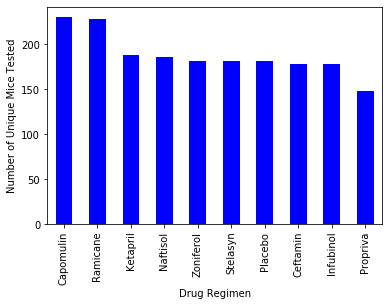

In [51]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
drug_data = without_duplicate_df["Drug Regimen"].value_counts()
drug_data.plot(kind="bar", facecolor="blue")

# Set textual properties
plt.ylabel("Number of Unique Mice Tested")
plt.xlabel("Drug Regimen")

# Show plot
plt.show()

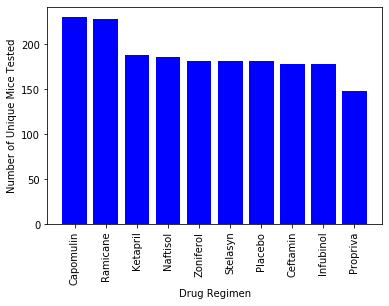

In [11]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.

# Setting x and y axis
drug_data = without_duplicate_df["Drug Regimen"].value_counts()
x_axis = drug_data.index.values
y_axis = drug_data.values

# Using matplotlib
plt.bar(x_axis, y_axis, color='blue', align="center")

# Set labels
plt.xlabel("Drug Regimen")
plt.xticks(rotation = 90)
plt.ylabel("Number of Unique Mice Tested")

# Show the graph
plt.show()

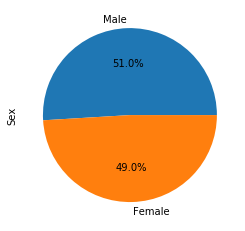

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_info = without_duplicate_df["Sex"].value_counts()
gender_info.plot(kind="pie", y = "Sex", autopct = "%1.1f%%")

# Show plot
plt.show()

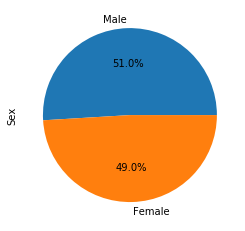

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Setting pie chart data and labels
gender_info = without_duplicate_df["Sex"].value_counts()
labels = gender_info.index.values
gender = gender_info.values

# Using matplotlib
plt.pie(gender, labels = labels, autopct="%1.1f%%")

# Set labels
plt.ylabel("Sex")

# Show the graph
plt.show()

## Quartiles, Outliers and Boxplots

In [17]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
tumor_max = without_duplicate_df.groupby("Mouse ID")["Timepoint"].max()
tumor_max_reset = tumor_max.reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
new_df = pd.merge(tumor_max_reset, without_duplicate_df,how = "left", on = ["Mouse ID", "Timepoint"])
new_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [21]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_final = new_df.loc[new_df["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    
    # Add subset 
    tumor_vol_list.append(tumor_final)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_final.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = tumor_final.loc[(tumor_final < lower_bound) | (tumor_final > upper_bound)]
    
    # Print statement
    print(f"{drug}'s ptential outliers: {outliers}")

Capomulin's ptential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's ptential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's ptential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's ptential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


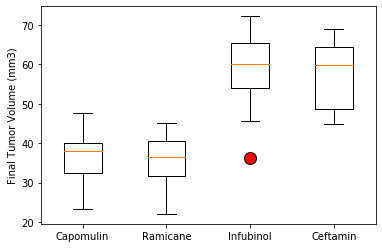

In [22]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# Create flierprop
flierprops = dict(marker = "o", markerfacecolor = "r", markersize = 12)

# Create box plot
plt.boxplot(tumor_vol_list, labels = treatment_list, flierprops = flierprops)
plt.ylabel("Final Tumor Volume (mm3)")

# Plot show
plt.show()

## Line and Scatter Plots

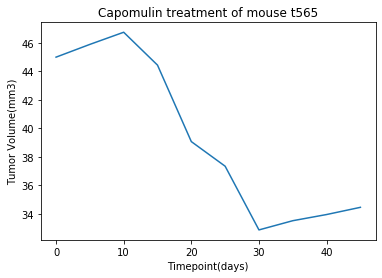

In [39]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin = without_duplicate_df.loc[without_duplicate_df["Drug Regimen"] == "Capomulin"]

# Select random mouse
random_mouse = capomulin.sample(1, random_state = 15)["Mouse ID"]
random_mouse_id = random_mouse.iloc[0]

# Set Data for random mouse
mouse_selected = capomulin.loc[capomulin["Mouse ID"] == random_mouse_id]
mouse_time = mouse_selected["Timepoint"]
mouse_tumor_vol = mouse_selected["Tumor Volume (mm3)"]

# Generate line plot for random mouse
treatment = plt.plot(mouse_time, mouse_tumor_vol)
plt.xlabel("Timepoint(days)")
plt.ylabel("Tumor Volume(mm3)")
plt.title(f"Capomulin treatment of mouse {random_mouse_id}")

plt.show()

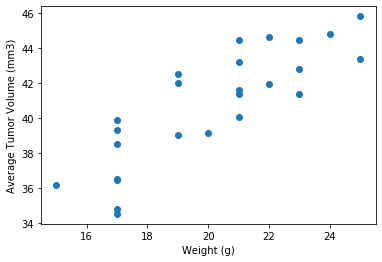

In [46]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

# Create groupby for plot
capomulin_mice = capomulin.groupby(capomulin["Mouse ID"])

# Tumor volume average
capomulin_mice_tumor_vol_avg = capomulin_mice["Tumor Volume (mm3)"].mean()

# Mouse weight average
capomulin_mice_weight_avg = capomulin_mice["Weight (g)"].mean()

# Create graph
plt.scatter(capomulin_mice_weight_avg, capomulin_mice_tumor_vol_avg)

# Create labels
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

# Plot Show
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


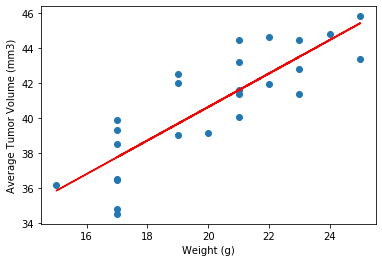

In [50]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# Set x and y axis
x_axis = capomulin_mice_weight_avg
y_axis = capomulin_mice_tumor_vol_avg

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)

regress_values = (x_axis*slope) + intercept
rounded_rvalue = round(rvalue, 2)

# Create graph
plt.scatter(capomulin_mice_weight_avg, capomulin_mice_tumor_vol_avg)

# Create line
plt.plot(x_axis, regress_values, "r-")

# Create labels
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

# Print statement
print(f"The correlation between mouse weight and the average tumor volume is {rounded_rvalue}")

# Plot Show
plt.show()